In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)
rc('text.latex', preamble=r'\usepackage{cmbright}')

# The Goal of Curve Fitting

This python code was written by Luke Polson. Please find out more details [here](https://github.com/lukepolson/youtube_channel/blob/main/Python%20Tutorial%20Series/curvefit1.ipynb).

Let us study, at first, the purpose of interpolation.

* Given some $x_{\text{data}}=[...]$ and $y_{\text{data}}=[...]$ and a model function $f$ that depends on unknown parameters $\beta$ the goal is to find the optimal set of parameters $\beta$ such that the function $y=f(x,\beta)$ best resembles the data.

One way of doing this is to minimize $\sum_i (f(x_i,\beta) - y_i)^2$ by adjusting the parameters in $\beta$. Here $x_i$ and $y_i$ are the $i$-th data point. This is called the **method of least squares**.

If the $y_i$ data points have corresponding errors on them, then minimizing $\sum_i (f(x_i,\beta) - y_i)^2/\sigma_i^2$ gives the so called maximum-likelihood estimate for $\beta$. Given the data $x_i$ and $y_i$, the the value of $\beta$ obtained through this method is the most likely configuration.

Lets look at some sample data:

In [50]:
x_data = np.array([0.        , 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.        ])
y_data = np.array([  2.95258285,   2.49719803,  -2.1984975 ,  -4.88744346,
        -7.41326345,  -8.44574157, -10.01878504, -13.83743553,
       -12.91548145, -15.41149046, -14.93516299, -13.42514157,
       -14.12110495, -17.6412464 , -16.1275509 , -16.11533771,
       -15.66076021, -13.48938865, -11.33918701, -11.70467566])

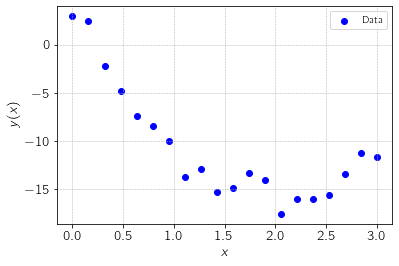

In [72]:
plt.scatter(x_data, y_data,color='b')
plt.ylabel('$y(x)$')
plt.xlabel('$x$')
plt.grid(linestyle='--',linewidth=0.5)
plt.legend(['Data'], scatterpoints=1,loc='upper right',fontsize=10)

plt.show()

Here is a model where $\beta = (a,b,c)$ and

$$f(x, \beta) = f(x, a, b, c) = a(x-b)^2 + c\,.$$

We want to find the optimal values of $a$, $b$, and $c$ that fit the data above

This requires two steps:

1. Define model function,
2. Use scipy's curve_fit function. This requires giving initial guesses for $\beta$, which one needs to obtain carefuly for complicated models, or else the function might not work.

Then, let us define a model function based on the equation above:


In [73]:
def model_f(x, a, b, c):
    return a*(x-b)**2 + c

Now we can get two things: optimal parameters (called $parameters$) and the parameters' covariance ($covariance$).
* $parameters$ gives the optimal parameters for the model_f given the data,
* $covariance$ shows us the covariance matrix, which gives an estimate of the "error" of the parameters (based on how sensitive the "goodness-of-fit" is to changing them) and the relation the parameters have to eachother (are two seperate parameters really needed?)

In [74]:
parameters, covariance = curve_fit(model_f, x_data, y_data, p0=[3,2,-16])

In [75]:
parameters

array([  4.92207991,   2.00492121, -16.04690266])

In [76]:
covariance

array([[ 0.12827822, -0.01315915, -0.07363194],
       [-0.01315915,  0.00222114,  0.00322289],
       [-0.07363194,  0.00322289,  0.13377697]])

So far, so good. Then, lets plot the function with the optimal parameters next to the data

a_opt, b_opt, c_opt = parameters
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

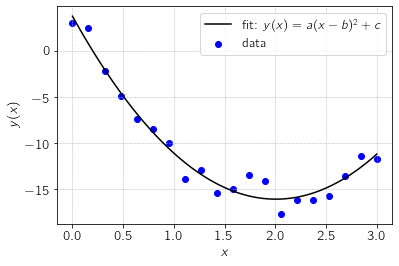

In [82]:
plt.scatter(x_data,y_data, color='b',label= 'data')
plt.plot(x_model,y_model, color='k',label='fit: $y(x) = a(x-b)^2+c$')
plt.ylabel('$y(x)$')
plt.xlabel('$x$')
plt.grid(linestyle='--',linewidth=0.5)
#plt.legend([r'fit: $y(x) = a(x-b)^2+c$'], scatterpoints=1,loc='upper right',fontsize=10)
plt.legend()
plt.show()
plt.show()

In [83]:
parameters

array([  4.92207991,   2.00492121, -16.04690266])

In [84]:
std = np.sqrt(np.diag(covariance))

In [85]:
std

array([0.35815949, 0.04712895, 0.36575534])

Therefore, our optimal parameters should be written down as follows

In [94]:
print('==========Fit parameters==========')
print('a = {:.3}±{:.2}'.format(parameters[0],std[0]))
print('b = {:.3}±{:.2}'.format(parameters[1],std[1]))
print('c = {:.4}±{:.2}'.format(parameters[2],std[2]))
print('==================================')

==========Fit parameters==========
a = 4.92±0.36
b = 2.0±0.047
c = -16.05±0.37


#### Example 1
Now, lets fit parameters that we have obtained for a Wilberfoce pendulum. The csv results are in </Users/mac/OneDrive/2021/physics_bachelor/FO/projeto_final/resultados>

In [155]:
df = pd.read_csv('/Users/mac/OneDrive/2021/physics_bachelor/FO/projeto_final/resultados/wilberfoceResult1.csv', engine='python',usecols=['time','z'])

In [156]:
df.keys()

Index(['time', 'z'], dtype='object')

In [161]:
x_pendulum = df['time']
y_pendulum = df['z']

In [162]:
x_pendulum

0       0.000000
1       0.033333
2       0.066667
3       0.100000
4       0.133333
         ...    
531    17.700000
532    17.733333
533    17.766667
534    17.800000
535    17.833333
Name: time, Length: 536, dtype: float64

In [163]:
y_pendulum

0      0.313330
1      0.278898
2      0.192818
3      0.136006
4      0.075750
         ...   
531    0.025824
532    0.024102
533    0.022381
534    0.017216
535    0.000000
Name: z, Length: 536, dtype: float64

Now, we plot the experimental data to verify it.

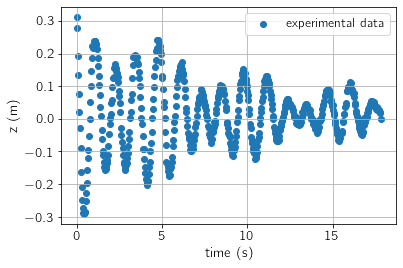

In [168]:
plt.scatter(x_pendulum,y_pendulum,label='experimental data')
plt.ylabel('z (m)')
plt.xlabel ('time (s)')
plt.legend()
plt.grid()
plt.show()

In [169]:
def model_fit(x, a, b, c):
    return a*(np.cos(b*x))*(np.cos(c*x))

In [170]:
parameters, covariance = curve_fit(model_fit, x_pendulum, y_pendulum, p0=[0.3,5.7,0.1])

In [171]:
parameters

array([0.1578769 , 5.17056498, 0.09642095])

In [172]:
covariance

array([[4.28699783e-05, 1.12177270e-07, 6.67049773e-06],
       [1.12177270e-07, 4.33974792e-05, 1.11405716e-07],
       [6.67049773e-06, 1.11405716e-07, 8.64075227e-06]])

Now, lets plot the data and the optimal fit curve

In [175]:
a_opt, b_opt, c_opt = parameters
x_model = np.linspace(min(x_pendulum), max(x_pendulum), 100)
y_model = model_fit(x_model, a_opt, b_opt, c_opt)

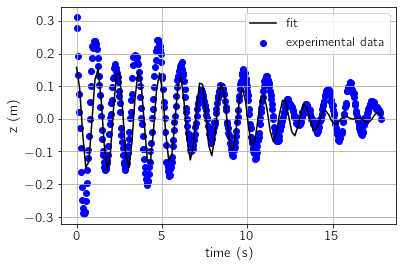

In [186]:
plt.scatter(x_pendulum,y_pendulum,label='experimental data',color='b')
plt.plot(x_model,y_model, color='k',label='fit')
plt.ylabel('z (m)')
plt.xlabel ('time (s)')
plt.legend()
plt.grid()
plt.show()

In [185]:
std = np.sqrt(np.diag(covariance))
print('==========Fit parameters==========')
print('A = {:.2}±{:.1}'.format(parameters[0],std[0]))
print('B = {:.3}±{:.0}'.format(parameters[1],std[1]))
print('C = {:.2}±{:.1}'.format(parameters[2],std[2]))
print('==================================')

==========Fit parameters==========
A = 0.16±0.007
B = 5.17±0.007
C = 0.096±0.003
